In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from scipy.signal import find_peaks

In [5]:
df = pd.read_excel("dados_flx25_controle_machos_femeas_all.xlsx")

In [6]:
df.head()

,categoria,trecho,q_inicio,q_fim,id_j,@f,@Vd,@Van,@ceX,@ceY,@arM,@altM,@larM,sexo,dosagem,unidade
0,Swimming,0,126,190,5f8f5517d3d64947e0da241b,126,2.837332,0.742996,205.100,123.923,27.7320,4.77899,11.20080,femea,veiculo,A6
1,Swimming,0,126,190,5f8f5517d3d64947e0da241b,127,2.670318,0.699261,205.446,121.586,29.0769,4.86800,11.10900,femea,veiculo,A6
2,Swimming,0,126,190,5f8f5517d3d64947e0da241b,128,174.304761,45.644200,208.645,117.210,26.7436,10.67820,3.89783,femea,veiculo,A6
3,Swimming,0,126,190,5f8f5517d3d64947e0da241b,129,-69.536770,-18.209200,205.374,102.144,16.7786,8.36027,2.97792,femea,veiculo,A6
4,Swimming,0,126,190,5f8f5517d3d64947e0da241b,130,70.774434,18.533300,202.148,95.839,20.8537,10.71940,3.01483,femea,veiculo,A6


In [7]:
df["dosagem"].unique()

array(['veiculo', 'flx2.5mg'], dtype=object)

In [8]:
df_femea_ve = df[(df["sexo"] == "femea") &(df['dosagem'] == "veiculo" )]
df_femea_flx = df[(df["sexo"] == "femea") &(df['dosagem'] == "flx2.5mg" )]
df_macho_ve = df[(df["sexo"] == "macho") &(df['dosagem'] == "veiculo" )]
df_macho_flx = df[(df["sexo"] == "macho") &(df['dosagem'] == "flx2.5mg" )]
df_femea_ve

,categoria,trecho,q_inicio,q_fim,id_j,@f,@Vd,@Van,@ceX,@ceY,@arM,@altM,@larM,sexo,dosagem,unidade
0,Swimming,0,126,190,5f8f5517d3d64947e0da241b,126,2.837332,0.742996,205.100,123.923,27.7320,4.77899,11.20080,femea,veiculo,A6
1,Swimming,0,126,190,5f8f5517d3d64947e0da241b,127,2.670318,0.699261,205.446,121.586,29.0769,4.86800,11.10900,femea,veiculo,A6
2,Swimming,0,126,190,5f8f5517d3d64947e0da241b,128,174.304761,45.644200,208.645,117.210,26.7436,10.67820,3.89783,femea,veiculo,A6
3,Swimming,0,126,190,5f8f5517d3d64947e0da241b,129,-69.536770,-18.209200,205.374,102.144,16.7786,8.36027,2.97792,femea,veiculo,A6
4,Swimming,0,126,190,5f8f5517d3d64947e0da241b,130,70.774434,18.533300,202.148,95.839,20.8537,10.71940,3.01483,femea,veiculo,A6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187188,Immobility,173,7438,7536,5f8f5517d3d64947e0da2423,7531,0.000000,0.000000,214.578,151.335,16.7057,3.43689,6.74650,femea,veiculo,A7
187189,Immobility,173,7438,7536,5f8f5517d3d64947e0da2423,7532,3.818771,1.000000,213.801,152.189,17.6292,3.56419,7.12837,femea,veiculo,A7
187190,Immobility,173,7438,7536,5f8f5517d3d64947e0da2423,7533,0.000000,0.000000,213.798,152.177,17.6454,3.56419,7.12837,femea,veiculo,A7
187191,Immobility,173,7438,7536,5f8f5517d3d64947e0da2423,7534,0.000000,0.000000,213.798,152.177,17.6454,3.56419,7.12837,femea,veiculo,A7


In [9]:
df_femea_flx

,categoria,trecho,q_inicio,q_fim,id_j,@f,@Vd,@Van,@ceX,@ceY,@arM,@altM,@larM,sexo,dosagem,unidade
37693,Climbing,0,167,845,5f8f5510d3d64947e0da23b3,167,-124.391898,-32.824700,191.563,153.570,26.46400,6.56861,10.10560,femea,flx2.5mg,A7
37694,Climbing,0,167,845,5f8f5510d3d64947e0da23b3,168,101.904897,26.890800,196.028,152.293,21.15050,9.96544,3.43247,femea,flx2.5mg,A7
37695,Climbing,0,167,845,5f8f5510d3d64947e0da23b3,169,9.361291,2.470270,198.044,152.238,22.23550,10.27750,3.43247,femea,flx2.5mg,A7
37696,Climbing,0,167,845,5f8f5510d3d64947e0da23b3,170,0.398353,0.105118,199.061,152.240,22.33920,10.29080,3.43247,femea,flx2.5mg,A7
37697,Climbing,0,167,845,5f8f5510d3d64947e0da23b3,171,-206.404141,-54.466200,201.787,148.991,20.28880,3.41062,10.23190,femea,flx2.5mg,A7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216698,Immobility,224,7449,7561,5f8f550fd3d64947e0da239b,7556,0.000000,0.000000,129.598,109.381,6.95231,1.54152,7.35186,femea,flx2.5mg,A4
216699,Immobility,224,7449,7561,5f8f550fd3d64947e0da239b,7557,8.767060,2.338020,128.796,111.139,6.39769,1.83376,7.09767,femea,flx2.5mg,A4
216700,Immobility,224,7449,7561,5f8f550fd3d64947e0da239b,7558,0.000000,0.000000,129.032,111.011,6.42893,1.83376,7.09767,femea,flx2.5mg,A4
216701,Immobility,224,7449,7561,5f8f550fd3d64947e0da239b,7559,-1.014552,-0.270563,129.583,111.540,6.17115,1.79994,5.57567,femea,flx2.5mg,A4


In [10]:
df_femea_ve["categoria"].unique() 

array(['Swimming', 'Immobility', 'Climbing', 'Diving', 'Undefined',
       'Headshaking'], dtype=object)

In [11]:
def get_plot_arm(df):
    df_femea_ve_vd = df["@arM"].reset_index()
    x = df_femea_ve_vd[df_femea_ve_vd["@arM"] != 0].rolling(100).median().dropna()["@arM"] # df_femea_ve_vd["@Vd"].rolling(100).sum().dropna()
    x = x.reset_index()["@arM"]
#     peaks, _ = find_peaks(abs(x)) #, height=50)
#     plt.plot(peaks, x[peaks], "x")
#     plt.show()
#     plt.hist(x[peaks],bins=60)
    plt.show()
    plt.hist(x,bins=30)
    plt.show()



def get_plot(df):
    df_femea_ve_vd = df["@Vd"].reset_index()
    x = df_femea_ve_vd[df_femea_ve_vd["@Vd"] != 0].rolling(100).median().dropna()["@Vd"] # df_femea_ve_vd["@Vd"].rolling(100).sum().dropna()
    x = x.reset_index()["@Vd"]
    peaks, _ = find_peaks(abs(x)) #, height=50)
    plt.plot(peaks, x[peaks], "x")
    plt.show()
    plt.hist(x[peaks],bins=60)
    plt.show()
    plt.hist(x,bins=60)
    plt.show()

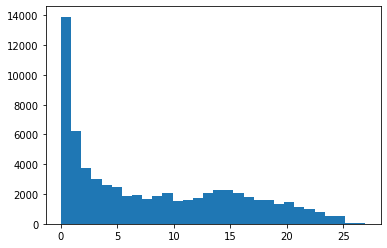

In [12]:
get_plot_arm(df_femea_ve)

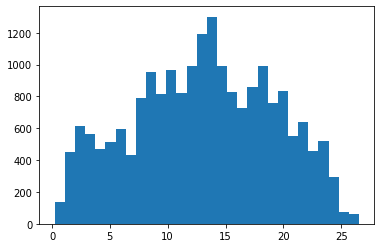

In [13]:
get_plot_arm(df_femea_ve[df_femea_ve["categoria"] == "Immobility"])

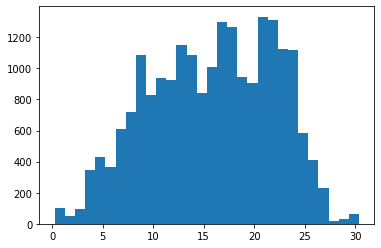

In [14]:
get_plot_arm(df_femea_flx[df_femea_flx["categoria"] == "Immobility"])

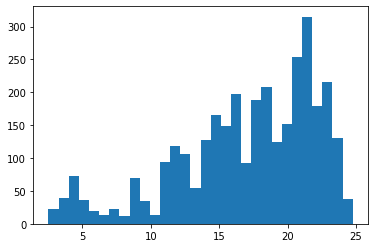

In [15]:
get_plot_arm(df_femea_ve[df_femea_ve["categoria"] == "Swimming"])

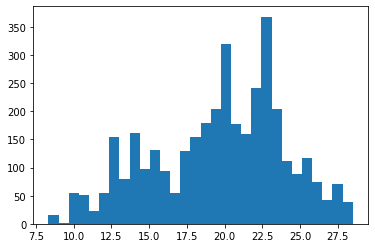

In [16]:
get_plot_arm(df_femea_flx[df_femea_flx["categoria"] == "Swimming"])

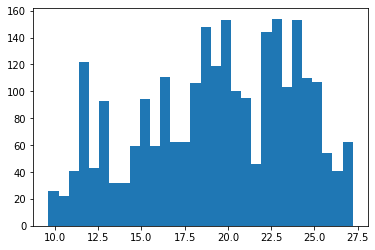

In [17]:
get_plot_arm(df_macho_flx[df_macho_flx["categoria"] == "Swimming"])

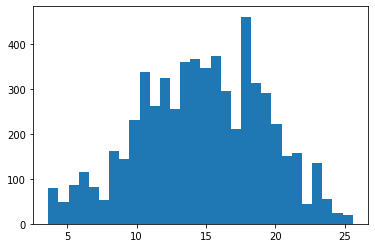

In [18]:
get_plot_arm(df_macho_ve[df_macho_ve["categoria"] == "Swimming"])

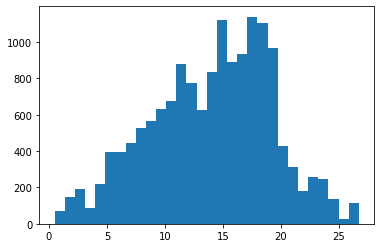

In [19]:
get_plot_arm(df_macho_ve[df_macho_ve["categoria"] == "Immobility"])

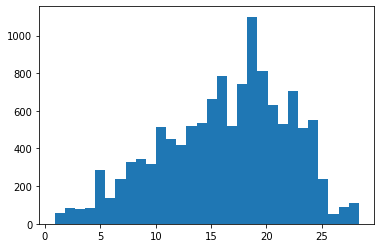

In [20]:
get_plot_arm(df_macho_flx[df_macho_flx["categoria"] == "Immobility"])

In [21]:
# df_femea_ve_vd = df_femea_ve["@Vd"].reset_index()
# df_femea_ve_vd

In [22]:
# x = df_femea_ve_vd["@Vd"].rolling(100)
# # plt.plot(x)
# plt.plot(df_femea_ve_vd[df_femea_ve_vd["@Vd"] != 0].rolling(100).median().dropna()["@Vd"])

In [23]:
# x = df_femea_ve_vd[df_femea_ve_vd["@Vd"] != 0].rolling(100).median().dropna()["@Vd"] # df_femea_ve_vd["@Vd"].rolling(100).sum().dropna()
# # ind = [i for i in range(len(x))]
# x = x.reset_index()["@Vd"]

In [24]:
# # x = df_femea_ve["@Vd"][0:1000].rolling(30).sum()
# # x = df_femea_ve_vd[0:1000].rolling(30).sum().dropna()
# plt.plot(x)

# peaks, _ = find_peaks(abs(x)) #, height=50)
# plt.plot(peaks, x[peaks], "x")

In [25]:
# plt.hist(x[peaks],bins=60)

In [26]:
# x_n = abs(df_femea_ve["@Vd"][0:1000])
# x = df_femea_ve["@Vd"][0:1000]

In [27]:
# peaks, _ = find_peaks(x_n)
# peaks

In [28]:
# plt.figure(figsize=(8, 6), dpi=80)
# plt.plot(x)
# plt.plot(peaks, x[peaks], "x")

In [29]:
# plt.hist(x[peaks])